In [1]:
import string
import random
import os
import pprint

### Download Youtube video

In [2]:
from pytube import YouTube

In [3]:
# Use the YouTube class to fetch the video
yt = YouTube("https://www.youtube.com/watch?v=2A9vLlClbYc&t=317s")
title = yt.title
print(f"Retrieved {title}")
stream = yt.streams.filter(progressive=True).get_highest_resolution()
print(f"Best video stream: {stream}")

Retrieved Neymar Jr Best Skills With Commentary / Crowd Reaction
Best video stream: <Stream: itag="22" mime_type="video/mp4" res="720p" fps="25fps" vcodec="avc1.64001F" acodec="mp4a.40.2" progressive="True" type="video">


In [4]:
# Use the get method of the video object to fetch the video
video_file = title.translate(str.maketrans("","",string.punctuation)).replace(" ", "_") + ".mp4"
#stream.download(output_path = "../media", filename = video_file)

print("Downloaded {}".format("../media/{}".format(video_file)))


Downloaded ../media/Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4


In [5]:
video_path = f"../media/{video_file}"
print("video_path:   {}".format(video_path))

video_path:   ../media/Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4


 ### Blur

In [6]:
import numpy as np
import moviepy.editor as mpy
import moviepy.video.fx as fx
from moviepy.video.VideoClip import ImageClip
import cv2
import skimage.filters

print("np version {}".format(np.__version__))
print("cv2 version {}".format(cv2.__version__))
print("skimage version {}".format(skimage.__version__))

np version 1.19.5
cv2 version 4.1.2
skimage version 0.17.2


In [7]:
# Open the video file
clip = mpy.VideoFileClip(video_path)
fps = clip.fps
width, height = clip.size
print(f"Width: {width}, Height {height}, fps: {fps}")

Width: 1280, Height 720, fps: 25.0


In [8]:
# Calculate blur pixels from watermark from screenshot
sc_size = (1219, 688)
top_left = (115,468)
bottom_right = (175, 487)
def calculate_blur_region(video_size, sc_size, top_left, bottom_right):
    x1 = top_left[0]/sc_size[0]*video_size[0]
    x2 = bottom_right[0]/sc_size[0]*video_size[0]
    y1 = top_left[1]/sc_size[1]*video_size[1]
    y2 = bottom_right[1]/sc_size[1]*video_size[1]
    return int(x1), int(x2), int(y1), int(y2)

x1, x2, y1, y2 = calculate_blur_region((width, height), sc_size, top_left, bottom_right)
print("x1: {}, x2: {}, y1: {}, y2: {}".format(x1, x2, y1, y2))

x1: 120, x2: 183, y1: 489, y2: 509



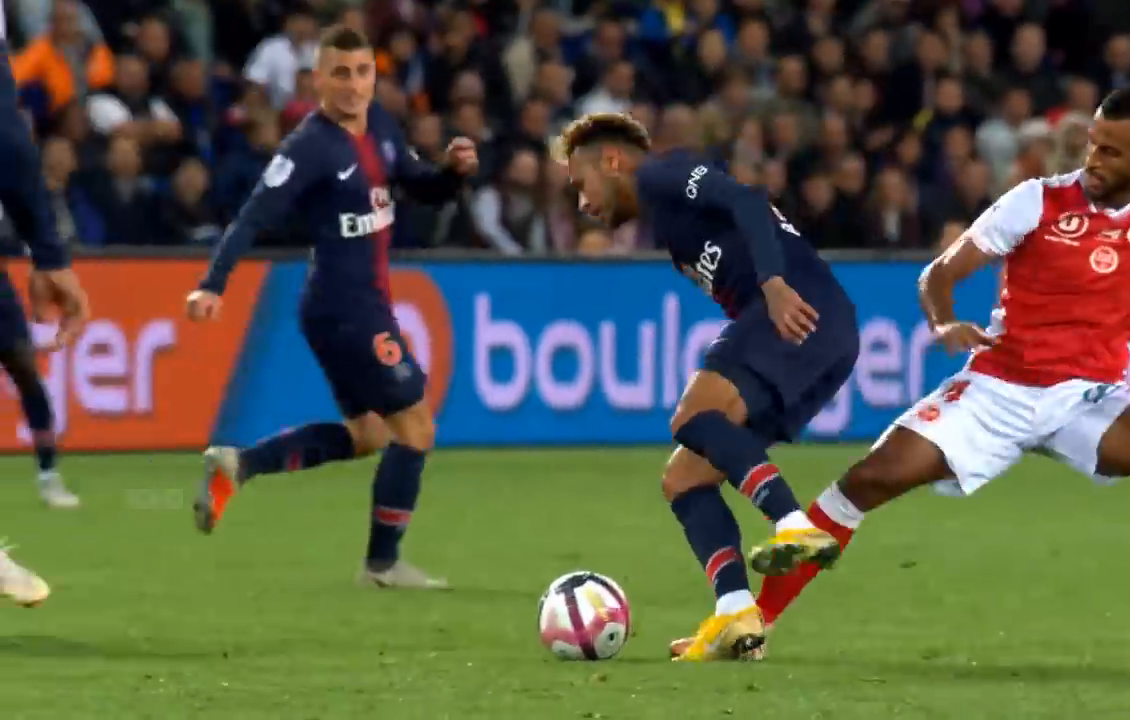

In [9]:
# Edit the file

# Define a function to apply the blur filter
def blur_region(image):
    x1, x2, y1, y2 = calculate_blur_region((width, height), sc_size, top_left, bottom_right)

    img_copy = image.copy()
    # img_copy[y1:y2, x1:x2] = skimage.filters.gaussian(image[y1:y2, x1:x2], sigma=3)
    img_copy[y1:y2, x1:x2] = cv2.GaussianBlur(image[y1:y2, x1:x2], (11,11), cv2.BORDER_DEFAULT)
    
    return img_copy

# Apply the blur filter to the video
blurred_clip = clip.fl_image(blur_region)

# Crop clip
blurred_clip = fx.all.crop(blurred_clip, x2 = 1130)

# Display a clip
blurred_clip.ipython_display(t = 10, width = 600)

In [10]:
# Play subclip

# getting only first 3 seconds
subclip = blurred_clip.subclip(8, 11)

# Display clip in notebook
# subclip.ipython_display(width = 480, fps = 15)

# Display external interactive image
# blurred_clip.show(11, interactive = True)
  
# Externally previewing the subclip at fps = 20
# subclip.preview(fps = 20)

In [11]:
# Save the output video file
# blurred_clip.write_videofile(f"../media/blurred_mpy_{video_file}")

In [20]:
subclip_times = [
    ("0:11", "0:17"),
    ("0:28", "0:43"),
    ("0:44", "0:52"),
    ("0:53", "1:05"),
    ("1:06", "1:14"),
    ("1:35", "1:42"),
    ("1:43", "1:56"),
    ("1:57", "2:07"),
    ("2:08", "2:20"),
    ("2:41", "2:57"),
    ("2:59", "3:13"),
    ("3:14", "3:22"),
    ("3:24", "3:33"),
    ("3:34", "3:49"),
    ("3:50", "4:03"),
    ("4:12", "4:27"),
    ("4:28", "4:39"),
]

print(len(subclip_times))
def convert_ts_to_sec(ts):
    ts = ts.split(":")
    return int(ts[0])*60 + int(ts[1])


subclip_times = [(convert_ts_to_sec(s[0]), convert_ts_to_sec(s[1])) for s in subclip_times]
subclip_times

17


[(11, 17),
 (28, 43),
 (44, 52),
 (53, 65),
 (66, 74),
 (95, 102),
 (103, 116),
 (117, 127),
 (128, 140),
 (161, 177),
 (179, 193),
 (194, 202),
 (204, 213),
 (214, 229),
 (230, 243),
 (252, 267),
 (268, 279)]

In [13]:
video_file

'Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4'

In [21]:
# Get full video 
# video_clip = blurred_clip
video_clip = mpy.VideoFileClip(f"../media/blurred_mpy_{video_file}")
fps = video_clip.fps
width, height = video_clip.size
print(f"Width: {width}, Height {height}, fps: {fps}")

Width: 1130, Height 720, fps: 25.0


In [22]:
from moviepy.audio.fx.all import *

music_path = "../audio/"
music_file = "parado_no_bailaio.m4a"
music = mpy.AudioFileClip(music_path + music_file)
# music.preview()

In [23]:
# Get background
final_size = (900, 1600)
bg = ImageClip("../media/images/neymar_wallpaper.jpeg")
bg = bg.resize(final_size)
bg = bg.set_duration(1)
#bg.preview()

In [24]:
# Create subclips
from moviepy.video.compositing.CompositeVideoClip import *
from moviepy.video.VideoClip import *

only_do_first = False
use_background_image = False

#bg_color = "black"

subclips = []
for i, (start, end) in enumerate(subclip_times[:]):
    if only_do_first:
        if i > 1: break
            
    subclip = video_clip.subclip(start,end)
    duration = subclip.duration
    
    # Add music
    music_clip = music.fx(volumex, 0.5).fx(audio_fadein, 1)
    new_audioclip = mpy.CompositeAudioClip([subclip.audio.fx(volumex, 2), music_clip])
    new_audioclip = new_audioclip.set_duration(duration).set_fps(44100)
    subclip = subclip.set_audio(new_audioclip)
    
    # Resize
    # Crop clip
    subclip = fx.all.crop(subclip, x2 = 1080)
    subclip = subclip.resize(width = final_size[0])
    s_size, s_width = subclip.size
    
    #Layer over backgroud
    subclip = subclip.set_position(("center",  "center"))
    
    if use_background_image:
        subclip = CompositeVideoClip([bg, subclip], use_bgclip = True).set_audio(new_audioclip)
    else:
        # Set black background
        bg_color_clip = ColorClip(final_size, color = (0,0,0), duration=duration)
        subclip = CompositeVideoClip([bg_color_clip, subclip], use_bgclip = True).set_audio(new_audioclip)
    
    subclips.append(subclip)
    
print(subclips)

[<moviepy.video.compositing.CompositeVideoClip.CompositeVideoClip object at 0x7fc3941df828>, <moviepy.video.compositing.CompositeVideoClip.CompositeVideoClip object at 0x7fc3622fe898>, <moviepy.video.compositing.CompositeVideoClip.CompositeVideoClip object at 0x7fc3622fe4e0>, <moviepy.video.compositing.CompositeVideoClip.CompositeVideoClip object at 0x7fc3622fe6d8>, <moviepy.video.compositing.CompositeVideoClip.CompositeVideoClip object at 0x7fc362314cc0>, <moviepy.video.compositing.CompositeVideoClip.CompositeVideoClip object at 0x7fc36230e3c8>, <moviepy.video.compositing.CompositeVideoClip.CompositeVideoClip object at 0x7fc36230ea90>, <moviepy.video.compositing.CompositeVideoClip.CompositeVideoClip object at 0x7fc3622f9198>, <moviepy.video.compositing.CompositeVideoClip.CompositeVideoClip object at 0x7fc3622f9860>, <moviepy.video.compositing.CompositeVideoClip.CompositeVideoClip object at 0x7fc3622f9f28>, <moviepy.video.compositing.CompositeVideoClip.CompositeVideoClip object at 0x7f

In [25]:
# Display clip in notebook

# subclips[0].audio.preview()

# subclips[0].ipython_display(width = 480, fps = 15)
  
# Externally previewing the subclip at fps = 20, pick a random subclip
random_index = random.choice(range(len(subclips)))
subclips[random_index].preview(fps = 20)

time, position, color :  6.750, (259, 612), [103 115  38]
time, position, color :  6.750, (259, 612), [103 115  38]
time, position, color :  6.750, (259, 612), [103 115  38]
time, position, color :  6.750, (259, 612), [103 115  38]
time, position, color :  6.750, (259, 612), [103 115  38]
time, position, color :  6.750, (259, 612), [103 115  38]
time, position, color :  6.800, (259, 612), [103 115  38]
time, position, color :  6.800, (259, 612), [103 115  38]
time, position, color :  6.800, (259, 612), [103 115  38]
time, position, color :  6.800, (259, 612), [103 115  38]
time, position, color :  6.800, (259, 612), [103 115  38]
time, position, color :  6.800, (259, 612), [103 115  38]
time, position, color :  6.800, (259, 612), [103 115  38]
time, position, color :  6.800, (259, 612), [103 115  38]
time, position, color :  6.800, (259, 612), [103 115  38]
time, position, color :  6.800, (259, 612), [103 115  38]
time, position, color :  6.800, (259, 612), [103 115  38]
time, position

[{'color': array([103, 115,  38], dtype=uint8),
  'position': (259, 612),
  'time': 6.75},
 {'color': array([103, 115,  38], dtype=uint8),
  'position': (259, 612),
  'time': 6.75},
 {'color': array([103, 115,  38], dtype=uint8),
  'position': (259, 612),
  'time': 6.75},
 {'color': array([103, 115,  38], dtype=uint8),
  'position': (259, 612),
  'time': 6.75},
 {'color': array([103, 115,  38], dtype=uint8),
  'position': (259, 612),
  'time': 6.75},
 {'color': array([103, 115,  38], dtype=uint8),
  'position': (259, 612),
  'time': 6.75},
 {'color': array([103, 115,  38], dtype=uint8),
  'position': (259, 612),
  'time': 6.8},
 {'color': array([103, 115,  38], dtype=uint8),
  'position': (259, 612),
  'time': 6.8},
 {'color': array([103, 115,  38], dtype=uint8),
  'position': (259, 612),
  'time': 6.8},
 {'color': array([103, 115,  38], dtype=uint8),
  'position': (259, 612),
  'time': 6.8},
 {'color': array([103, 115,  38], dtype=uint8),
  'position': (259, 612),
  'time': 6.8},
 {'c

In [19]:
# Save subclips
only_save_first = False
for i, clip in enumerate(subclips[11:]):
    if only_save_first:
        if i > 0:
            break
    clip.write_videofile(f"../clips/black_bg_clip{i}_{video_file}", audio_codec='aac')


chunk:   0%|          | 0/155 [00:00<?, ?it/s, now=None]

Moviepy - Building video ../clips/black_bg_clip0_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4.
MoviePy - Writing audio in black_bg_clip0_Neymar_Jr_Best_Skills_With_Commentary__Crowd_ReactionTEMP_MPY_wvf_snd.mp4


t:   0%|          | 0/175 [00:00<?, ?it/s, now=None]              

MoviePy - Done.
Moviepy - Writing video ../clips/black_bg_clip0_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4



Moviepy - Done !
Moviepy - video ready ../clips/black_bg_clip0_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4
Moviepy - Building video ../clips/black_bg_clip1_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4.
MoviePy - Writing audio in black_bg_clip1_Neymar_Jr_Best_Skills_With_Commentary__Crowd_ReactionTEMP_MPY_wvf_snd.mp4


t:   0%|          | 0/325 [00:00<?, ?it/s, now=None]              

MoviePy - Done.
Moviepy - Writing video ../clips/black_bg_clip1_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4



chunk:   0%|          | 0/221 [00:00<?, ?it/s, now=None]      

Moviepy - Done !
Moviepy - video ready ../clips/black_bg_clip1_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4
Moviepy - Building video ../clips/black_bg_clip2_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4.
MoviePy - Writing audio in black_bg_clip2_Neymar_Jr_Best_Skills_With_Commentary__Crowd_ReactionTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video ../clips/black_bg_clip2_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4



chunk:   0%|          | 0/265 [00:00<?, ?it/s, now=None]      

Moviepy - Done !
Moviepy - video ready ../clips/black_bg_clip2_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4
Moviepy - Building video ../clips/black_bg_clip3_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4.
MoviePy - Writing audio in black_bg_clip3_Neymar_Jr_Best_Skills_With_Commentary__Crowd_ReactionTEMP_MPY_wvf_snd.mp4


t:   0%|          | 0/300 [00:00<?, ?it/s, now=None]              

MoviePy - Done.
Moviepy - Writing video ../clips/black_bg_clip3_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4



chunk:   0%|          | 0/353 [00:00<?, ?it/s, now=None]      

Moviepy - Done !
Moviepy - video ready ../clips/black_bg_clip3_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4
Moviepy - Building video ../clips/black_bg_clip4_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4.
MoviePy - Writing audio in black_bg_clip4_Neymar_Jr_Best_Skills_With_Commentary__Crowd_ReactionTEMP_MPY_wvf_snd.mp4


t:   0%|          | 0/400 [00:00<?, ?it/s, now=None]              

MoviePy - Done.
Moviepy - Writing video ../clips/black_bg_clip4_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4



chunk:   0%|          | 0/309 [00:00<?, ?it/s, now=None]      

Moviepy - Done !
Moviepy - video ready ../clips/black_bg_clip4_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4
Moviepy - Building video ../clips/black_bg_clip5_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4.
MoviePy - Writing audio in black_bg_clip5_Neymar_Jr_Best_Skills_With_Commentary__Crowd_ReactionTEMP_MPY_wvf_snd.mp4


t:   0%|          | 0/350 [00:00<?, ?it/s, now=None]              

MoviePy - Done.
Moviepy - Writing video ../clips/black_bg_clip5_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4



chunk:   0%|          | 0/177 [00:00<?, ?it/s, now=None]      

Moviepy - Done !
Moviepy - video ready ../clips/black_bg_clip5_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4
Moviepy - Building video ../clips/black_bg_clip6_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4.
MoviePy - Writing audio in black_bg_clip6_Neymar_Jr_Best_Skills_With_Commentary__Crowd_ReactionTEMP_MPY_wvf_snd.mp4


t:   0%|          | 0/200 [00:00<?, ?it/s, now=None]              

MoviePy - Done.
Moviepy - Writing video ../clips/black_bg_clip6_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4



chunk:   0%|          | 0/199 [00:00<?, ?it/s, now=None]      

Moviepy - Done !
Moviepy - video ready ../clips/black_bg_clip6_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4
Moviepy - Building video ../clips/black_bg_clip7_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4.
MoviePy - Writing audio in black_bg_clip7_Neymar_Jr_Best_Skills_With_Commentary__Crowd_ReactionTEMP_MPY_wvf_snd.mp4


t:   0%|          | 0/225 [00:00<?, ?it/s, now=None]              

MoviePy - Done.
Moviepy - Writing video ../clips/black_bg_clip7_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4



chunk:   0%|          | 0/331 [00:00<?, ?it/s, now=None]      

Moviepy - Done !
Moviepy - video ready ../clips/black_bg_clip7_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4
Moviepy - Building video ../clips/black_bg_clip8_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4.
MoviePy - Writing audio in black_bg_clip8_Neymar_Jr_Best_Skills_With_Commentary__Crowd_ReactionTEMP_MPY_wvf_snd.mp4


t:   0%|          | 0/375 [00:00<?, ?it/s, now=None]              

MoviePy - Done.
Moviepy - Writing video ../clips/black_bg_clip8_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4



chunk:   0%|          | 0/287 [00:00<?, ?it/s, now=None]      

Moviepy - Done !
Moviepy - video ready ../clips/black_bg_clip8_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4
Moviepy - Building video ../clips/black_bg_clip9_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4.
MoviePy - Writing audio in black_bg_clip9_Neymar_Jr_Best_Skills_With_Commentary__Crowd_ReactionTEMP_MPY_wvf_snd.mp4


t:   0%|          | 0/325 [00:00<?, ?it/s, now=None]              

MoviePy - Done.
Moviepy - Writing video ../clips/black_bg_clip9_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4



chunk:   0%|          | 0/331 [00:00<?, ?it/s, now=None]      

Moviepy - Done !
Moviepy - video ready ../clips/black_bg_clip9_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4
Moviepy - Building video ../clips/black_bg_clip10_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4.
MoviePy - Writing audio in black_bg_clip10_Neymar_Jr_Best_Skills_With_Commentary__Crowd_ReactionTEMP_MPY_wvf_snd.mp4


t:   0%|          | 0/375 [00:00<?, ?it/s, now=None]              

MoviePy - Done.
Moviepy - Writing video ../clips/black_bg_clip10_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4



chunk:   0%|          | 0/243 [00:00<?, ?it/s, now=None]      

Moviepy - Done !
Moviepy - video ready ../clips/black_bg_clip10_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4
Moviepy - Building video ../clips/black_bg_clip11_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4.
MoviePy - Writing audio in black_bg_clip11_Neymar_Jr_Best_Skills_With_Commentary__Crowd_ReactionTEMP_MPY_wvf_snd.mp4


t:   1%|          | 2/275 [00:00<00:14, 18.80it/s, now=None]      

MoviePy - Done.
Moviepy - Writing video ../clips/black_bg_clip11_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4



Moviepy - Done !
Moviepy - video ready ../clips/black_bg_clip11_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4


### Upload to youtube

In [182]:
# Get all the clips 
clip_files = sorted(os.listdir('../clips/'))
clip_file = "../clips/" + clip_files[3]
print(f"Video to upload: {video_file}")

Video to upload: ../clips/clip3_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4


In [183]:
import upload_video
import youtube

In [184]:
from googleapiclient.discovery import build
from apiclient.http import MediaFileUpload
import google.oauth2.credentials
# from oauth2client.client import flow_from_clientsecrets
import json 

In [185]:
## Datetime exploration

import datetime
# Get the current date and time
now = datetime.datetime.now()

# Calculate tomorrow's date by adding one day to the current date
tomorrow = now + datetime.timedelta(days=1)

# Create a datetime object for December 27th, 2022 at 12:00 AM
specific_datetime = datetime.datetime(2022, 12, 23, 0, 0)

# Convert the date and time to ISO 8601 format
iso_datetime = specific_datetime.isoformat()

print(iso_datetime)

2022-12-23T00:00:00


In [186]:
# Create a YouTube service object
youtube = upload_video.get_authenticated_service()

In [187]:
# Set the video file and metadata
title = 'Neymar Jr crazy skills 🔥 #shorts #neymarjr #football'
description = 'Neymar Jr skills and tricks #shorts'
tags = ['shorts', 'soccer', 'neymarjr']

# Create the request body
request_body = {
    'snippet': {
        'title': title,
        'description': description,
        'tags': tags
    },
    'status': {
        'privacyStatus': 'public', # private, unlisted
        # 'publishAt':  iso_datetime  # can be set if privacyStatus=private
        'selfDeclaredMadeForKids' : False
    }
}

# Create the request
request = youtube.videos().insert(
    part=",".join(request_body.keys()),
    body=request_body,
    media_body=MediaFileUpload(clip_file, mimetype='video/mp4', resumable=True)
)

pprint.pprint(json.loads(request.to_json()))

{'_in_error_state': False,
 'body': '{"snippet": {"title": "Neymar Jr crazy skills  \\ud83d\\udd25 '
         '#shorts #neymarjr #football", "description": "Neymar Jr skills and '
         'tricks #shorts", "tags": ["shorts", "soccer", "neymarjr"]}, '
         '"status": {"privacyStatus": "public", "selfDeclaredMadeForKids": '
         'false}}',
 'body_size': 259,
 'headers': {'accept': 'application/json',
             'accept-encoding': 'gzip, deflate',
             'content-type': 'application/json',
             'user-agent': '(gzip)',
             'x-goog-api-client': 'gdcl/2.52.0 gl-python/3.6.10'},
 'method': 'POST',
 'methodId': 'youtube.videos.insert',
 'response_callbacks': [],
 'resumable': '{"_filename": '
              '"../clips/clip3_Neymar_Jr_Best_Skills_With_Commentary__Crowd_Reaction.mp4", '
              '"_mimetype": "video/mp4", "_chunksize": 104857600, '
              '"_resumable": true, "_size": 3405861, "_class": '
              '"MediaFileUpload", "_module": "

In [188]:
# Execute the request
response = upload_video.resumable_upload(request)

# Print the response
print(response)

Uploading file...
Video id 'Ij7SrF3qLm8' was successfully uploaded.
None


In [190]:
video_id = response['id']

TypeError: 'NoneType' object is not subscriptable

In [123]:
# video_id = response['id']


#Note: shorts cannot have thumbnails
video_id = "gLW72MEqhZs"
thumbnail_file = "../media/images/Sparkle.png"
r = youtube.thumbnails().set(
    videoId=video_id,
    media_body=MediaFileUpload(thumbnail_file, mimetype='image/png'))
# r.execute()

{'etag': 'rmCN4BS7mUeeTQMzCZyPJhh-RFk',
 'items': [{'default': {'height': 90,
    'url': 'https://i9.ytimg.com/vi/gLW72MEqhZs/default.jpg?sqp=CNTtnp0G&rs=AOn4CLAhpABHM0GmX8SZNbRi-srS73lsbQ',
    'width': 120},
   'high': {'height': 360,
    'url': 'https://i9.ytimg.com/vi/gLW72MEqhZs/hqdefault.jpg?sqp=CNTtnp0G&rs=AOn4CLDNL10sUmEy2fF8z5VEkRXr6AOrjA',
    'width': 480},
   'maxres': {'height': 720,
    'url': 'https://i9.ytimg.com/vi/gLW72MEqhZs/maxresdefault.jpg?sqp=CNTtnp0G&rs=AOn4CLDbXTyRqqRH88vzkqV_Q6YwObzDMA',
    'width': 1280},
   'medium': {'height': 180,
    'url': 'https://i9.ytimg.com/vi/gLW72MEqhZs/mqdefault.jpg?sqp=CNTtnp0G&rs=AOn4CLCu5HhE17nlS6DLVtCkEnkSiFfwnw',
    'width': 320},
   'standard': {'height': 480,
    'url': 'https://i9.ytimg.com/vi/gLW72MEqhZs/sddefault.jpg?sqp=CNTtnp0G&rs=AOn4CLDFkRF6ratZ9dvMEDJJ-NGeob5ceA',
    'width': 640}}],
 'kind': 'youtube#thumbnailSetResponse'}

###  OpenCV 

In [ ]:
# Open the video file and get dimensions
video_capture = cv2.VideoCapture(video_path)
print(video_capture)

width = video_capture.get(cv2.CAP_PROP_FRAME_WIDTH)
height = video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT)
fps =  video_capture.get(cv2.CAP_PROP_FPS)
print(f"Width: {width}, Height {height}, fps: {fps}")

# Set the output video file
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
video_writer = cv2.VideoWriter(f"../media/blurred_{video_file}", fourcc, fps, (int(width), int(height)))

In [ ]:
# OpenCV
# Loop through each frame in the video
i = 0
while False:
    
    # Read the next frame
    success, frame = video_capture.read()

    # If there are no more frames, break out of the loop
    if not success:
        break

    # Blur a section of the frame
    # x1, y1, x2, y2 = calculate_blur_region((width, height), sc_size, top_left, bottom_right)
    frame[y1:y2, x1:x2] = cv2.blur(frame[y1:y2, x1:x2], (10, 10))

    # Write the frame to the output video file
    video_writer.write(frame)
    
    if i % 1000 == 0:
        print(f"frame {i}")
    i += 1

# Release the video capture and video writer objects
video_capture.release()
video_writer.release()